## CS22B2004 - VIGNESH ARAVINDH B
## CS22B2053 - DHIVYA DHARSHAN V

---

## Exp03: Two Level Cache Implementation with victim, Instruction stream buffers, Data Stream buffers, write buffers.

Please use Exp01 and extend the implementation of two level caches.
Processor address is 16bit
1) Level1 Cache - Direct Mapped, Size is 2K words, Each word is 64bits and block size is 16 Words.
2) Level2 Cache - 4 Way Associate Cache with 16KWords
3) Main Memory - 64K Words

Use the following along with L1 Cache
1) Write Buffers - Size is 4 Blocks
2) Victim Cache - Size is 4 Blocks
3) Prefetch Cache - Instruction Stream Buffer of size 4 Blocks
4) Prefetch Cache - Data Stream Buffer of size 4 Blocks

Consider the Cache Block with Valid bit, Dirty bit.

Implement above multilevel Cache and demonstrate the caches misses of Exp01 is reduced.

<h3 style = "color:red"> The implementation has been done in cpp and visual analytics has been given in python</h3>

---

<h1> Address generation </h1>
<p> The addresses are generated randomly and stored in a text file which is accesed in cpp </p>

In [6]:
import random
temp1 = 0
with open("addresses.txt", "w") as f:
    for _ in range(30000):
        temp = random.randint(0, 65535)
        if(_ == 0):
            temp1 = temp
        # print(temp)
        f.write(f"{temp}\n")
    # f.write(f"{temp1}\n")


<h3> Analytics </h3>

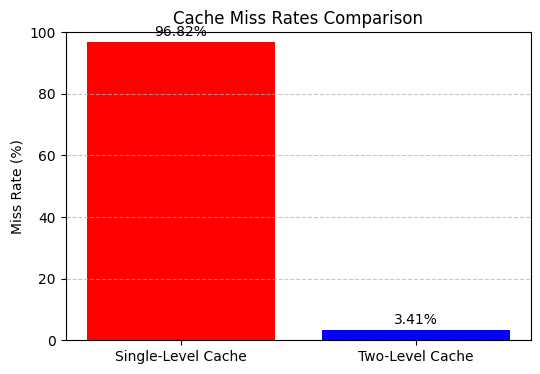

In [12]:
import matplotlib.pyplot as plt

# Read the file and extract values
miss_rates = {}

with open("cache_stats.txt", "r") as file:
    for line in file:
        parts = line.strip().split(": ")
        if len(parts) == 2:  # Ensuring proper key-value format
            key, value = parts
            try:
                miss_rates[key] = float(value)  # Convert numerical values to float
            except ValueError:
                pass  # Ignore non-numeric values

# Extracting required values
l1_miss_rate = miss_rates.get("Effective Miss Rate in one-level cache", 0) * 100
l2_miss_rate = miss_rates.get("Effective Miss Rate in two-level cache", 0) * 100

# Plot the bar graph
categories = ["Single-Level Cache", "Two-Level Cache"]
values = [l1_miss_rate, l2_miss_rate]

plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['red', 'blue'])
plt.ylabel("Miss Rate (%)")
plt.title("Cache Miss Rates Comparison")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display values on bars
for i, rate in enumerate(values):
    plt.text(i, rate + 2, f"{rate:.2f}%", ha='center', fontsize=10)

plt.show()


<h2> The below code gives a graphical representation of the 'venture' of an address in the computer</h2>
<h3> Connected edges represent the path it has traveled, leaving the other vertices unexplored, if an address gets hit it doesnt go to its home (main memory) </h3>

<h3>Drag the slider to see the paths of different addresses</h3>

In [7]:
from IPython.display import HTML
import matplotlib.pyplot as plt

plt.rcParams["animation.html"] = "jshtml"  # Enables inline animations in Jupyter


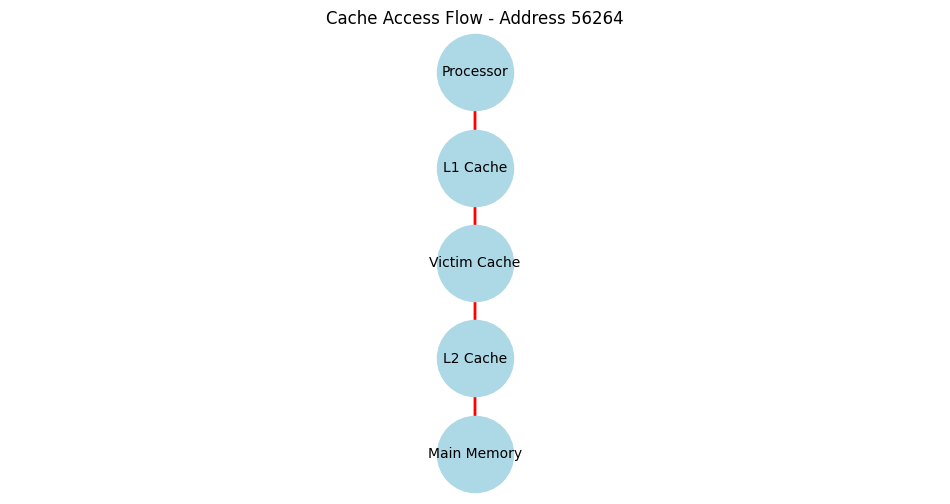

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as animation

# Define cache hierarchy levels
levels = ["Processor", "L1 Cache", "Victim Cache", "L2 Cache", "Main Memory"]
pos = {lvl: (2, -i) for i, lvl in enumerate(levels)}

# Parse cache log file
def parse_log(file_path):
    access_data = []
    with open(file_path, "r") as file:
        for line in file:
            parts = line.strip().split()
            addr = int(parts[0])  # Extract address
            path = ["Processor"]
            
            if "L1_HIT" in parts:
                path.append("L1 Cache")
            else:
                path.append("L1 Cache")
                if "VC_HIT" in parts:
                    path.append("Victim Cache")
                else:
                    path.append("Victim Cache")
                    if "L2_HIT" in parts:
                        path.append("L2 Cache")
                    else:
                        path.append("L2 Cache")
                        path.append("Main Memory")
            
            access_data.append((addr, path))
    
    return access_data[100:200]  # Limit to 50 addresses for animation

# Animation function
def update(num, access_data, G, ax):
    ax.clear()
    ax.set_title(f"Cache Access Flow - Address {access_data[num][0]}")
    
    # Draw static nodes
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, edge_color="gray", width=2, arrows=True, ax=ax)
    
    # Highlight the current address path dynamically
    path = access_data[num][1]
    edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2, arrows=True, ax=ax)
    
# Initialize Graph
G = nx.DiGraph()
G.add_nodes_from(levels)

# Read log data
log_file = "cache_log.txt"
access_data = parse_log(log_file)

# Set up animation
fig, ax = plt.subplots(figsize=(12, 6))
ani = animation.FuncAnimation(fig, update, frames=len(access_data), fargs=(access_data, G, ax), interval=1000, repeat=False)

# Display animation in Jupyter
HTML(ani.to_jshtml())

